In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

In [ ]:
df = pd.read_csv(r"/content/Tweets.csv")

In [ ]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
df.drop_duplicates(inplace = True)
df = df[df['airline_sentiment'] != 'neutral']

In [ ]:
df=df[['text','airline_sentiment']]
df.head(5) # shuffle the df and pick first 5

,text,airline_sentiment
1,@VirginAmerica plus you've added commercials t...,positive
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative
5,@VirginAmerica seriously would pay $30 a fligh...,negative
6,"@VirginAmerica yes, nearly every time I fly VX...",positive


In [ ]:
df['text'] = df['text'].str.replace("[^a-zA-Z#]"," ")
df

<ipython-input-6-76dfbf8170a7>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace("[^a-zA-Z#]"," ")


,text,airline_sentiment
1,VirginAmerica plus you ve added commercials t...,positive
3,VirginAmerica it s really aggressive to blast...,negative
4,VirginAmerica and it s a really big bad thing...,negative
5,VirginAmerica seriously would pay a fligh...,negative
6,VirginAmerica yes nearly every time I fly VX...,positive
...,...,...
14633,AmericanAir my flight was Cancelled Flightled...,negative
14634,AmericanAir right on cue with the delays,negative
14635,AmericanAir thank you we got on a different f...,positive
14636,AmericanAir leaving over minutes Late Flig...,negative


In [ ]:
df['text'] = df['text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3 ]))
df

,text,airline_sentiment
1,VirginAmerica plus added commercials experienc...,positive
3,VirginAmerica really aggressive blast obnoxiou...,negative
4,VirginAmerica really thing about,negative
5,VirginAmerica seriously would flight seats tha...,negative
6,VirginAmerica nearly every time this worm away,positive
...,...,...
14633,AmericanAir flight Cancelled Flightled leaving...,negative
14634,AmericanAir right with delays,negative
14635,AmericanAir thank different flight Chicago,positive
14636,AmericanAir leaving over minutes Late Flight w...,negative


In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop=set(stopwords.words("english"))
print(stop)

{'out', "it's", 't', 'aren', "aren't", 'at', 'shouldn', 'her', 'once', 'you', "you'd", 'i', 'how', 'don', 'did', "weren't", 'than', "don't", 'some', 'weren', "that'll", 'doing', 'hers', 'their', 'for', 'and', 'your', 'below', 'into', "you'll", 'having', 'or', 'because', 'so', 'by', 'too', 'them', 'his', 'y', "hasn't", 'should', "wasn't", 'during', 'won', 'further', 'between', "isn't", 'a', 'when', "couldn't", 'wouldn', "you've", "doesn't", 'before', "won't", 'on', 'yours', 'this', 'my', 'up', 'both', "she's", 'these', 'very', 'can', 'll', 'herself', 'does', 'over', 'above', 'hadn', 'an', "shan't", "you're", 'as', 'will', 'has', 'we', 'ourselves', 'myself', 'about', "hadn't", 'ain', 'me', 'what', 'of', 'hasn', 'against', "should've", 'not', 'are', 'from', 'in', 'our', 've', 'were', 'him', 'where', 'it', 'but', 'while', 'if', 'been', 'have', 'yourself', 'shan', 'all', 'its', 'he', 'most', 'to', 'off', 'only', 'needn', 'couldn', 'same', "wouldn't", "didn't", 'didn', 'isn', 'had', "mightn'

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df

,text,airline_sentiment
1,VirginAmerica plus added commercials experienc...,positive
3,VirginAmerica really aggressive blast obnoxiou...,negative
4,VirginAmerica really thing,negative
5,VirginAmerica seriously would flight seats pla...,negative
6,VirginAmerica nearly every time worm away,positive
...,...,...
14633,AmericanAir flight Cancelled Flightled leaving...,negative
14634,AmericanAir right delays,negative
14635,AmericanAir thank different flight Chicago,positive
14636,AmericanAir leaving minutes Late Flight warnin...,negative


In [ ]:
list_negative = df[df['airline_sentiment']=='negative']
list_positive = df[df['airline_sentiment']=='positive']

In [ ]:
def count_values_in_column(data,feature):
 total=data.loc[:,feature].value_counts(dropna=False)
 percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
 return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])
#Count_values for sentiment
count_values_in_column(df,'airline_sentiment')

,Total,Percentage
negative,9159,79.55
positive,2354,20.45


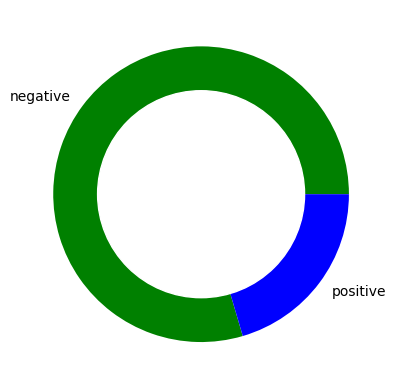

In [ ]:
# create data for Pie Chart
pc = count_values_in_column(df,'airline_sentiment')
names= pc.index
size=pc['Percentage']

# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [ ]:
tokenized_text1= df['text'].apply(lambda x: x.split())
tokenized_text1

1        [VirginAmerica, plus, added, commercials, expe...
3        [VirginAmerica, really, aggressive, blast, obn...
4                           [VirginAmerica, really, thing]
5        [VirginAmerica, seriously, would, flight, seat...
6         [VirginAmerica, nearly, every, time, worm, away]
                               ...                        
14633    [AmericanAir, flight, Cancelled, Flightled, le...
14634                         [AmericanAir, right, delays]
14635     [AmericanAir, thank, different, flight, Chicago]
14636    [AmericanAir, leaving, minutes, Late, Flight, ...
14638    [AmericanAir, money, change, flight, answer, p...
Name: text, Length: 11513, dtype: object

In [ ]:
from nltk import PorterStemmer
ps = PorterStemmer()
tokenized_text1 = tokenized_text1.apply(lambda x: [ps.stem(i) for i in x])
tokenized_text1

1        [virginamerica, plu, ad, commerci, experi, tacki]
3        [virginamerica, realli, aggress, blast, obnoxi...
4                           [virginamerica, realli, thing]
5        [virginamerica, serious, would, flight, seat, ...
6         [virginamerica, nearli, everi, time, worm, away]
                               ...                        
14633    [americanair, flight, cancel, flightl, leav, t...
14634                          [americanair, right, delay]
14635        [americanair, thank, differ, flight, chicago]
14636    [americanair, leav, minut, late, flight, warn,...
14638    [americanair, money, chang, flight, answer, ph...
Name: text, Length: 11513, dtype: object

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=1000)
vectors = vectorizer.fit_transform(df['text'])
vectors

<11513x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 81094 stored elements in Compressed Sparse Row format>

In [ ]:
words_df = pd.DataFrame(vectors.toarray(), columns=vectorizer.get_feature_names_out())
words_df.head()

,able,absolute,absolutely,acceptable,access,accommodate,account,actual,actually,adding,...,worth,would,wrong,yall,yeah,year,years,yesterday,your,zero
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.310116,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
count = pd.DataFrame(words_df.sum())
countdf = count.sort_values(0,ascending=True).head(20)
countdf[1:11]

,0
step,6.029695
requested,6.155467
till,6.239851
print,6.324693
stopped,6.325988
nothappy,6.352064
overbooked,6.358701
clean,6.379790
previous,6.434545
along,6.436342


In [ ]:
X = words_df
y = df['airline_sentiment']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=1,test_size=0.1,shuffle=False)

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9, solver='lbfgs', max_iter=3000)
logreg.fit(x_train, y_train)
prediction_linear = logreg.predict(vectors)``
logreg.score(x_test,y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.9383680555555556

In [ ]:
from sklearn import svm
from sklearn.metrics import classification_report
# Perform classification with SVM, kernel=linear
clf_svm = svm.SVC(kernel='linear')
clf_svm.fit(vectors, df['airline_sentiment'])
prediction_linear1 = clf_svm.predict(vectors)
clf_svm.score(x_test,y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


0.9618055555555556

In [ ]:
report = classification_report(df['airline_sentiment'], prediction_linear1, output_dict=True)
print('positive: ', report['positive'])
print('negative: ', report['negative'])

positive:  {'precision': 0.8989280245022971, 'recall': 0.7480883602378929, 'f1-score': 0.8166009738001391, 'support': 2354}
negative:  {'precision': 0.9379317563324262, 'recall': 0.9783819194235178, 'f1-score': 0.9577299203762091, 'support': 9159}


In [ ]:
def predict_sentiment():
    review=input()
    review_vector = vectorizer.transform([review])
    print(clf_svm.predict(review_vector))#accuracy of svm model is more

In [ ]:
for i in range(5):
  predict_sentiment()

I'm not ok
['negative']
i am a devil
['negative']
i am a good boy
['positive']
dirty
['negative']
cool
['positive']
